In [18]:
%matplotlib inline
import mxnet as mx
import numpy as np
import matplotlib.pyplot as plt

In [19]:
a = mx.nd.empty((2,3))
b = mx.nd.empty((2,3), mx.gpu(0))

In [20]:
print b.shape
print b.context

(2L, 3L)
gpu(0)


In [21]:
X = np.linspace(-1,1,100)
noise = np.random.normal(0,0.5,100)
Y = 5 * X + noise

注意，这里的名字不能乱起，data和softmax必须这么写，一开始写成softmax出错了

In [22]:
X_in = mx.symbol.Variable('data')
Y_out = mx.symbol.Variable('softmax_label')
net = mx.symbol.FullyConnected(data=X_in, num_hidden=1, name='pre')
loss = mx.symbol.LinearRegressionOutput(data=net, label=Y_out, name='loss')

这里的参数data_names和label_names同理，名字不可以乱起，而且这两个参数必须有

In [29]:
model = mx.mod.Module(
    context = mx.gpu(0),
    symbol = loss,
    data_names = ['data'],
    label_names = ['softmax_label']
)

In [30]:
batch_size = 1
#test_nums = [np.random.randint(100) for _ in range(20)]
#train_nums = [i for i in range(100) if i not in test_nums]
train_iter = mx.io.NDArrayIter(X, Y, batch_size=batch_size)
#train_iter = mx.io.NDArrayIter(X[train_nums], Y[train_nums], batch_size=batch_size)
#test_iter  = mx.io.NDArrayIter(X[test_nums],  Y[test_nums],  batch_size=batch_size)

注意，fit必须前两个参数必须是iter类型的参数，不能是numpy array类型的
fit第二个参数eval_data可以默认为空
可以改变优化参数，比如learning_rate，来看看最后拟合图像的区别

In [31]:
model.fit(
    train_data = train_iter,
    optimizer = 'sgd',
    num_epoch = 100,
    optimizer_params = {'learning_rate':0.0001, 'momentum':0.9, 'wd':0.00001},
)

In [32]:
prediction = model.predict(eval_data=train_iter)

In [58]:
for i in range(len(train_nums)):
    print X[train_nums[i]], prediction.asnumpy()[i]

-1.0 [-10.41361332]
-0.979797979798 [-10.25194073]
-0.959595959596 [-10.09026909]
-0.919191919192 [-9.7669239]
-0.89898989899 [-9.60525227]
-0.878787878788 [-9.44357967]
-0.858585858586 [-9.28190708]
-0.838383838384 [-9.12023449]
-0.818181818182 [-8.9585619]
-0.79797979798 [-8.79688931]
-0.757575757576 [-8.47354507]
-0.717171717172 [-8.15019989]
-0.69696969697 [-7.98852825]
-0.676767676768 [-7.82685566]
-0.656565656566 [-7.66518307]
-0.636363636364 [-7.50351048]
-0.616161616162 [-7.34183884]
-0.59595959596 [-7.18016624]
-0.575757575758 [-7.01849365]
-0.555555555556 [-6.85682106]
-0.535353535354 [-6.69514847]
-0.515151515152 [-6.53347588]
-0.494949494949 [-6.37180424]
-0.454545454545 [-6.04845905]
-0.434343434343 [-5.88678694]
-0.414141414141 [-5.72511482]
-0.393939393939 [-5.56344223]
-0.353535353535 [-5.24009705]
-0.333333333333 [-5.07842541]
-0.292929292929 [-4.75508022]
-0.272727272727 [-4.59340763]
-0.252525252525 [-4.43173504]
-0.232323232323 [-4.27006292]
-0.212121212121 [-4.1083

之前用
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X_data, y_data)
prediction之后用
line = ax.plot(X[train_nums], prediction.asnumpy(), 'r-', lw=5)
最后plt.show()显示不出来

用以下方法就可以显示了，不过看图和上边数据可以明显看出来拟合有问题

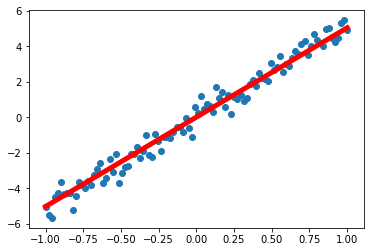

In [33]:
plt.scatter(X,Y)
plt.plot(X, prediction.asnumpy(), 'r-', lw=5)
plt.show()